In [14]:
##############################
# Solves -u'' + u = f        #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np


# Problem Parameters
a = -0.5
b = 0.5


def exact(*x):
    return np.prod(np.cos(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2 + 1) * exact(*x)  

In [15]:
# Parameters
d = 1
k = 1
deltas = np.arange(1, 21) / 100
N = 100

# Computed Parameters
ranges = ((a, b),) * d
phi = rad.Wendland(d, k)
xc = rad.gridn(ranges, N, flat=True)
integrator = rad.integrate.MeanIntegrator(ranges, 1000)
# integrator = rad.integrate.QuadIntegrator(ranges, epsabs=1e-3, epsrel=1e-3)

# Data collection
results = np.zeros((np.size(deltas), 2))

for i, delta in enumerate(deltas):
    # Solve for approximate solution
    solver = rad.solve.HelmholtzSolver(integrator, phi, delta, *xc)
    approx = solver.solve(f)
    error = rad.error(exact, approx, integrator)
    cond = solver.cond()
    
    results[i,0] = error 
    results[i, 1] = solver.cond()
    
    print("Delta:", delta)
    print("  L2 Relative Error:", error)
    print("  Condition Number:", solver.cond())

Delta: 0.01
  L2 Relative Error: 0.9960422660222635
  Condition Number: 7.936213106751422
Delta: 0.02
  L2 Relative Error: 0.5462284100131202
  Condition Number: 210.09850634548522
Delta: 0.03
  L2 Relative Error: 0.5461170600948562
  Condition Number: 1059.0265913268922
Delta: 0.04
  L2 Relative Error: 0.5495139161762735
  Condition Number: 1515.1098416170764
Delta: 0.05
  L2 Relative Error: 0.3396274067363232
  Condition Number: 8131.63119459334
Delta: 0.06
  L2 Relative Error: 0.1890333572781541
  Condition Number: 14066.509278289639
Delta: 0.07
  L2 Relative Error: 0.09476103907546529
  Condition Number: 58105.12799635492
Delta: 0.08
  L2 Relative Error: 0.039992196446748694
  Condition Number: 93877.84809031787
Delta: 0.09
  L2 Relative Error: 0.0071034141863277386
  Condition Number: 245198.27401302237
Delta: 0.1
  L2 Relative Error: 0.013164971648878773
  Condition Number: 372368.47653554357
Delta: 0.11
  L2 Relative Error: 0.02602038564824549
  Condition Number: 754027.26457713

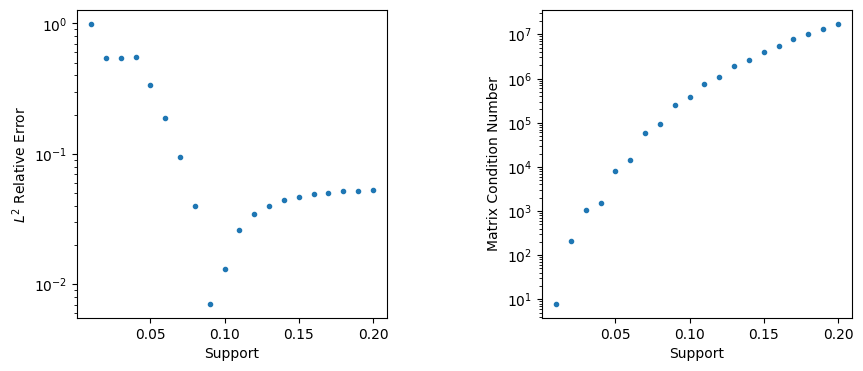

In [16]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 2, figsize=(10,4))

axs[0].set_xlabel("Support")
axs[0].set_ylabel(r"$L^{2}$ Relative Error")
axs[0].set_yscale('log')
axs[0].plot(deltas, results[:, 0], '.')

axs[1].set_xlabel("Support")
axs[1].set_ylabel("Matrix Condition Number")
axs[1].set_yscale('log')
axs[1].plot(deltas, results[:, 1], '.')

plt.subplots_adjust(wspace=0.5)
plt.show()